# Theory and methods

In [1]:
import numpy as np
import pandas as pd
import semopy as sem
import json

## A simple model of skills accumulation

The dynamics of child development has been increasingly a subject of study among researches in a wide range of disciplines. A simple theoretical framework is based on the idea of fixed, discrete set of skills (e.g. cognition, socioemotional, prysical health, nutrition) which evolve over time based on an unknown accumulation process (i.e. techonology). We can easily represent such structure as:

$$\theta_{k,t+1}=f_{k,t}(\theta_{k,t}, I_t, \theta_H, E_{k,t})$$

Where for $k$ different skills ($\theta$), the accumulation process is a function of previous skills, parental investments (I), fixed household characteristics (H) and time-varying enviromental factors (E). Similarly, we can describe the parental decisions regarging child invesments as a function of child characteristics, household constrains and prices (e.g. alternative cost of time) as follows:

$$I_t=g_t(\Theta_t, Z_t, \theta_H, v_t)$$

Where $\Theta_t$ is the vector of skills, $Z$ represents prices for different investments and other household information, while $v$ resumes other time-varying unobserved information. $v$ and $E$ is what we normally refer as shocks, i.e. unexpected events that can alter parental decisions but also the capacity of children to accumulate skills (e.g. natural disasters). 

If we divide the skills between nutritional status and other capacities, we can think about this model graphically as:

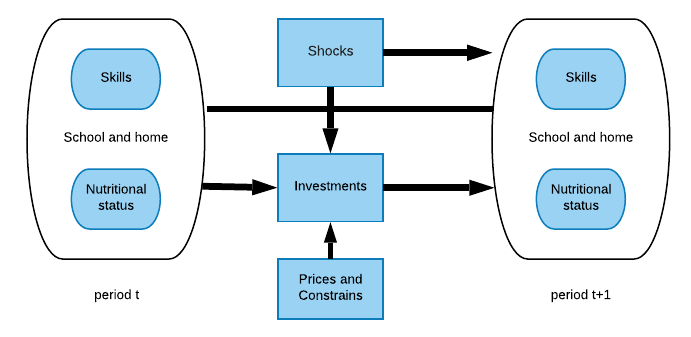

In [9]:
from IPython.display import Image
Image(filename='../assets/images/dag.png')

Ultimately, in onder to characterize, describe and predict skills, we are interested in two key elements. First, is important to measure different skills and parental investments through simple but information-rich indexes, in order to avoid dealing with too many moving pieces. Secondly, given a set of skills available, we would like to describe the evolution of skills across individuals and communities, in order to inform stakeholders as well as target, monitor and evaluate programs. Below we describe both steps.  

## Measuring skills and investments

In the following we will extract information about higher education programs throughout Chile for a series of years


In [2]:
data = pd.read_csv('../data/cned/cned.csv')

## Descriptives



In [24]:
# describe each of our relevant variables by year

# first store a grouped dataframe
dataByYear = data.groupby(by=['year', 'area'], sort=True)

dataByYear['ingreso2'].describe()

count       mean        std  min    25%   50%     75%  \
year area                                                                    
2005 Art/Humanities  119.0  40.025210  43.392662  1.0   7.50  31.0   54.50   
     Business         90.0  40.944444  65.179676  1.0   4.25  12.0   55.25   
     Education       303.0  36.303630  71.396015  1.0  12.00  26.0   40.00   
     Health          171.0  60.175439  88.634966  1.0  30.00  48.0   65.50   
     Law              82.0  45.304878  63.735311  1.0   6.00  16.5   57.25   
...                    ...        ...        ...  ...    ...   ...     ...   
2019 Education       301.0  34.478405  21.673571  1.0  18.00  31.0   47.00   
     Health          425.0  57.334118  33.135035  1.0  34.00  53.0   73.00   
     Law              86.0  79.034884  74.585198  3.0  32.00  60.0  103.75   
     STEM            487.0  47.552361  40.657670  1.0  19.00  39.0   64.00   
     SocSci          158.0  59.208861  46.480604  2.0  29.25  48.0   74.50   

                        max  
year area                    
2005 Art/Humanities   305.0  
     Business         373.0  
     Education       1032.0  
     Health           927.0  
     Law              342.0  
...                     ...  
2019 Education        124.0  
     Health           247.0  
     Law              519.0  
     STEM             393.0  
     SocSci           338.0  

[105 rows x 8 columns]

In [25]:
dataByYear.sum()

region       idc   puntaje  puntajenem  ingreso2  \
year area                                                               
2005 Art/Humanities    2202   1563199       0.0         0.0    4763.0   
     Business          4435   4004362     515.0         0.0    3685.0   
     Education         5572   3958585    1076.0         0.0   11000.0   
     Health            3074   2168528    2537.0         0.0   10290.0   
     Law               2729   2292779       0.0         0.0    3715.0   
...                     ...       ...       ...         ...       ...   
2019 Education         8956  25475479  149869.0    156955.0   10378.0   
     Health            8975  23799652  227328.0    222814.0   24367.0   
     Law               1253   2195442   42870.0     41170.0    6797.0   
     STEM             22780  68209132  259692.0    269971.0   23158.0   
     SocSci            3115   7853872   80209.0     76557.0    9355.0   

                     vacantes  ingreso    dp  
year area                                     
2005 Art/Humanities   10363.0    31556   299  
     Business         17917.0    43511   591  
     Education        25697.0    78339   720  
     Health           20810.0    61049   385  
     Law              17186.0    45211   348  
...                       ...      ...   ...  
2019 Education        37523.0   110288   847  
     Health           58854.0   205420   728  
     Law              10006.0    40492    90  
     STEM             91522.0   268280  2510  
     SocSci           19683.0    63002   260  

[105 rows x 8 columns]

In [26]:
data = data.sort_values(by='year')
data.dropna(inplace=True)
data

,region,idc,puntaje,puntajenem,ingreso2,vacantes,ingreso,year,dp,area
48146,7,8861,556.0,506.0,102.0,100.0,178,2013,0,Art/Humanities
48143,7,14954,579.0,527.0,79.0,80.0,264,2013,0,Education
48142,7,22085,589.0,551.0,51.0,50.0,104,2013,0,Education
48141,7,8868,573.0,549.0,93.0,100.0,357,2013,0,Education
48140,7,8867,606.0,534.0,55.0,55.0,174,2013,0,Education
...,...,...,...,...,...,...,...,...,...,...
1210,7,19440,519.0,487.0,34.0,35.0,130,2019,0,SocSci
1211,7,1359,574.0,547.0,106.0,90.0,514,2019,0,SocSci
1213,12,1273,536.0,518.0,58.0,60.0,293,2019,0,SocSci
1187,7,2867,532.0,529.0,18.0,30.0,71,2019,0,Education
